# Exploring the Dynamics of Financial Data Products

<i>By Diego Ramallo</i>

I decided to use Santander's [Kaggle dataset]('https://www.kaggle.com/c/santander-product-recommendation/data') to try to understand their business model and to potentially find solutions to trends, given my research on their company, their industry, and the health of the global financial system.

[Formatting Data](#Formatting Data)

[Visualizing data](#Visualizing Data)

[Splitting Data](#Splitting Data)

[Modeling Data](#Modeling Data)

[Model Validation](#Model Validation)

## Formatting Data

<a id='Formatting Data'></a>

In [2]:
import numpy as np#Math library
import pandas as pd#Table library
import matplotlib.pyplot as plt#Plotting library
import pandas as pd
import warnings
import seaborn as sns#Plotting library
warnings.filterwarnings('ignore')#Gets rid of popup warnings
%matplotlib nbagg

In [3]:
#Load data 
data= pd.read_csv('train_ver2.csv')

In [114]:
data.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


Here's an key for the column names (many of which are in Spanish). Just for reference, Santander is a bank.

* Column Name	Description

* fecha_dato	The table is partitioned for this column
* ncodpers	Customer code
* ind_empleado	Employee index: A active, B ex employed, F filial, N not employee, P pasive
* pais_residencia	Customer's Country residence
* sexo	Customer's sex
* age	Age
* fecha_alta	The date in which the customer became as the first holder of a contract in the bank
* ind_nuevo	New customer Index. 1 if the customer registered in the last 6 months.
* antiguedad	Customer seniority (in months)
* indrel	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
* ult_fec_cli_1t	Last date as primary customer (if he isn't at the end of the month)
* indrel_1mes	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
* tiprel_1mes	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
* indresi	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
* indext	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
* conyuemp	Spouse index. 1 if the customer is spouse of an employee
* canal_entrada	channel used by the customer to join
* indfall	Deceased index. N/S
* tipodom	Addres type. 1, primary address
* cod_prov	Province code (customer's address)
* nomprov	Province name
* ind_actividad_cliente	Activity index (1, active customer; 0, inactive customer)
* renta	Gross income of the household
* segmento	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
* ind_ahor_fin_ult1	Saving Account
* ind_aval_fin_ult1	Guarantees
* ind_cco_fin_ult1	Current Accounts
* ind_cder_fin_ult1	Derivada Account
* ind_cno_fin_ult1	Payroll Account
* ind_ctju_fin_ult1	Junior Account
* ind_ctma_fin_ult1	Más particular Account
* ind_ctop_fin_ult1	particular Account
* ind_ctpp_fin_ult1	particular Plus Account
* ind_deco_fin_ult1	Short-term deposits
* ind_deme_fin_ult1	Medium-term deposits
* ind_dela_fin_ult1	Long-term deposits
* ind_ecue_fin_ult1	e-account
* ind_fond_fin_ult1	Funds
* ind_hip_fin_ult1	Mortgage
* ind_plan_fin_ult1	Pensions
* ind_pres_fin_ult1	Loans
* ind_reca_fin_ult1	Taxes
* ind_tjcr_fin_ult1	Credit Card
* ind_valo_fin_ult1	Securities
* ind_viv_fin_ult1	Home Account
* ind_nomina_ult1	Payroll
* ind_nom_pens_ult1	Pensions
* ind_recibo_ult1	Direct Debit

In [5]:
#Now let's look at the data types since we can't see every column in our table
data.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [128]:
#Let's convert our dates to datetime objects to see when these customers created their accounts
data['fecha_dato']= pd.to_datetime(data['fecha_dato'])
data['fecha_alta']= pd.to_datetime(data['fecha_alta'])

In [129]:
#Let's see how many original timestamps are associated with each row
months= data['fecha_dato'].unique()
months

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
#Get the names of the columns that include sales
data.ix[0:1,24:].columns

Index([u'ind_ahor_fin_ult1', u'ind_aval_fin_ult1', u'ind_cco_fin_ult1',
       u'ind_cder_fin_ult1', u'ind_cno_fin_ult1', u'ind_ctju_fin_ult1',
       u'ind_ctma_fin_ult1', u'ind_ctop_fin_ult1', u'ind_ctpp_fin_ult1',
       u'ind_deco_fin_ult1', u'ind_deme_fin_ult1', u'ind_dela_fin_ult1',
       u'ind_ecue_fin_ult1', u'ind_fond_fin_ult1', u'ind_hip_fin_ult1',
       u'ind_plan_fin_ult1', u'ind_pres_fin_ult1', u'ind_reca_fin_ult1',
       u'ind_tjcr_fin_ult1', u'ind_valo_fin_ult1', u'ind_viv_fin_ult1',
       u'ind_nomina_ult1', u'ind_nom_pens_ult1', u'ind_recibo_ult1'],
      dtype='object')

In [8]:
sales= data.ix[:,24:]
sales.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
#Get the totals 
totals= sales.sum()

In [10]:
totalDF= pd.DataFrame(totals).reset_index()
totalDF.columns= ['account', 'sales']
totalDF= totalDF.sort_values('sales', ascending= False)
totalDF.head()

,account,sales
2,ind_cco_fin_ult1,8945588.0
7,ind_ctop_fin_ult1,1760616.0
23,ind_recibo_ult1,1745712.0
12,ind_ecue_fin_ult1,1129227.0
4,ind_cno_fin_ult1,1103620.0


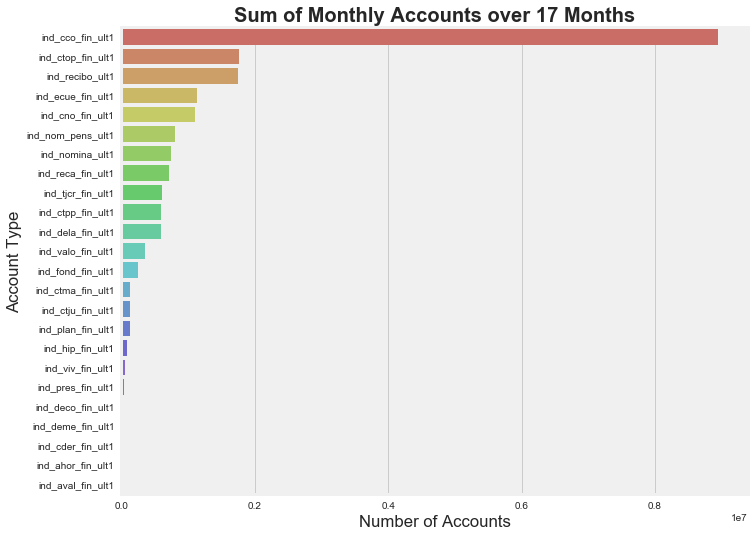

In [153]:
%matplotlib inline
plt.style.use('fivethirtyeight')
figure, ax = plt.subplots(1,1,figsize=(10,8),  facecolor='white')
sns.barplot(x= 'sales', y= 'account', data= totalDF, palette= 'hls')
plt.xlabel('Number of Accounts')
plt.ylabel('Account Type')
plt.title('Sum of Monthly Accounts over 17 Months', fontweight= 'bold')

Excellent, so <strong>ind_cco_fin_ult1 (current accounts)</strong> is the largest contributor to the total number of orders that Santander has from their customers by a lot. From Santander's [website]('http://www.santander.co.uk/uk/current-accounts'), we see that current accounts refers to what would normally be referred to as checking accounts. This makes a lot of sense since this is the most basic type of account and one could think as the others being 'luxury' items.

In [15]:
#Let's append the date column to our truncated dataset 
sales['date']= data['fecha_dato']

In [16]:
monthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    monthlyTotals = np.concatenate((monthlyTotals, sales[sales['date'] == months[i]].ix[:, sales.columns != 'date'].sum().values.reshape((24,1))), axis=1)

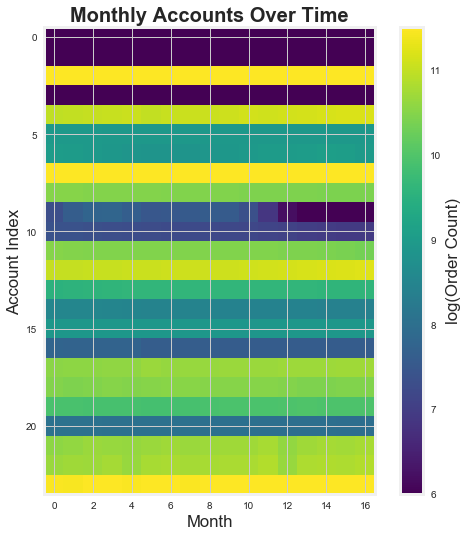

In [193]:
%matplotlib inline 
plt.style.use('fivethirtyeight')
figure, ax = plt.subplots(1,1,figsize=(8,8),  facecolor='white')
plt.imshow(np.log(monthlyTotals), cmap= 'viridis', vmax= 11.5, vmin= 6)
plt.xlabel('Month')
plt.ylabel('Account Index')
plt.title('Monthly Accounts Over Time', fontweight= 'bold')
plt.colorbar(label='log(Order Count)')

At this point it makes sense to try to narrow my focus a bit. According to Santander, their goal is to turn their customers into [https://www.bloomberg.com/news/features/2015-11-23/santander-s-ana-bot-n-has-something-to-prove]('loyal customers'). These types of customers pay bills with their checking account and own mortgages with Santander. Thus, for now I will focus on the accounts that represent this best: current (checking) accounts, direct deposit accounts, and mortgage accounts. Let's see what their monthly totals look like overtime.

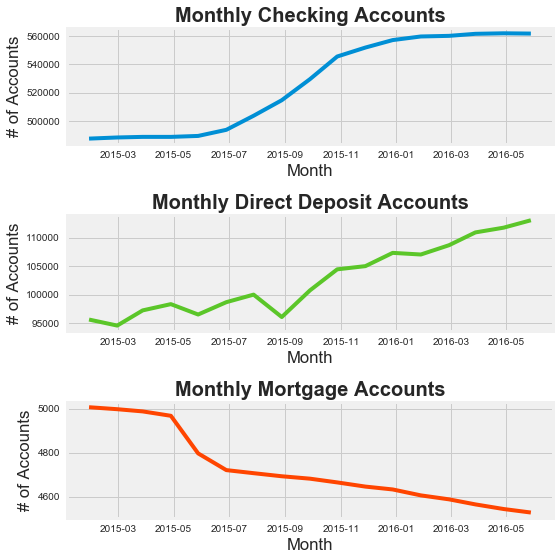

In [167]:
#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, monthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, monthlyTotals[23,:], color= '#5bc629')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, monthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()


Now that I kind of know roughly which metrics I can use as KPIs (accounts that fall under 'loyal customers'), I think that the next thing will be to refine them a bit. One thing I could try to do is to focus on the purchases in the united states. Would it also make sense to just . Finally, could I separate them into increases/decreases over time from month to month? Kind of like the progress time series plots for github? (eg. insertions and deletions)

## Focusing on US Data

<a id='Focusing on US Data'></a>

The fact that mortgages decreased is interesting. We do know some things about the state of housing in the United States during this time, here I'll try to see how the American contributions to these trends look in comparison.

In [169]:
#Look at all unique countries
data['pais_residencia'].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [171]:
#Let us reproduce same steps as before with only the US data
usData= data[data['pais_residencia'] == 'US']
usDataSales= usData.ix[:,24:]
usDataSales['date']= usData['fecha_dato']

In [174]:
usDataSales.head(3)

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,date
51948,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,2015-01-28
100486,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,1,2015-01-28
112925,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,2015-01-28


In [197]:
usMonthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    usMonthlyTotals = np.concatenate((usMonthlyTotals, usDataSales[usDataSales['date'] == months[i]].ix[:, usDataSales.columns != 'date'].sum().values.reshape((24,1))), axis=1)

#As before, we need to get rid of the first column since it was the initialization
#column that's just filled with zeros
usMonthlyTotals= usMonthlyTotals[:,1:]

In [198]:
print usMonthlyTotals.shape, monthlyTotals.shape

(24, 17) (24, 17)


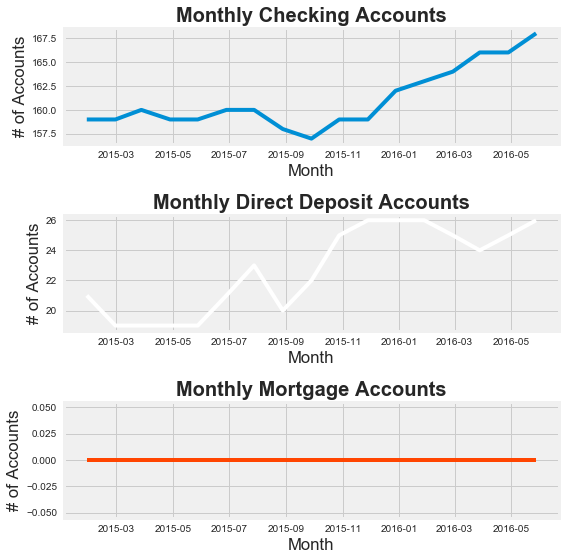

In [264]:
#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, usMonthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, usMonthlyTotals[23,:], color= 'white')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, usMonthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()

As you can see, there aren't very many checking, DD, and mortgage accounts coming from the United States, and thus it may not be helpful to try to understand the plateau or the decrease in mortgage accounts this way.

## Customer Segmentation

Here I will try to segment my users and see how different segments contribute to these trends. I'll start by:
* Consolidating the number of purchases for all customers 
* Joining this sales table to a table that only has the features for each client (age, location etc)
* Reducing the number of dimensions with PCA and scaling the data properly
* Perform clustering on the preprocessed data with DBscan since I don't know the correct number of clusters

In [232]:
#Aggregate sales of accounts for all months
sales['ncodpers']= data['ncodpers']
sales= sales.drop('uid', axis= 1)
aggSales= sales.groupby('ncodpers').sum()
aggSales.reset_index(inplace= True)
aggSales.head()

,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,15889,0,0,17,0,0,0,0,0,17,...,0,0,0,0,8,17,0,0.0,0.0,0
1,15890,0,0,0,0,17,0,0,0,17,...,0,17,0,0,17,0,0,17.0,17.0,17
2,15891,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,15892,0,0,12,0,5,0,0,0,0,...,0,0,0,17,17,17,0,0.0,0.0,17
4,15893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0,0.0,0.0,0


In [221]:
#Now extrac the user info from the original data table
#The following will take the unique user ids (ncodpers) 
#with everything except their purchase dates and purchases
userInfo= data.iloc[data['ncodpers'].unique()].ix[:,:24]
userInfo= userInfo.drop('fecha_dato', axis= 1)
userInfo.head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
1375586,672751,N,ES,H,37,2007-01-29,0.0,102,1.0,NaN,...,N,NaN,KAT,N,1.0,41.0,SEVILLA,1.0,72079.41,02 - PARTICULARES
1050611,1351953,N,ES,H,28,2014-11-11,0.0,8,1.0,NaN,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,83140.80,03 - UNIVERSITARIO
1050612,1351951,N,ES,V,25,2014-11-11,0.0,8,1.0,NaN,...,N,NaN,KHE,N,1.0,37.0,SALAMANCA,0.0,128575.53,03 - UNIVERSITARIO
1050613,1351928,NaN,NaN,NaN,NA,NaT,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050614,1351927,N,ES,H,32,2014-11-11,0.0,8,1.0,NaN,...,N,NaN,KHK,N,1.0,3.0,ALICANTE,0.0,35094.09,02 - PARTICULARES


In [235]:
#Join this table with the summary of aggregated sales table on ncodpers (user id)
userSummary= pd.merge(userInfo, aggSales, on='ncodpers', how='inner')
userSummary.head(5)

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,672751,N,ES,H,37,2007-01-29,0.0,102,1.0,NaN,...,0,0,0,0,0,0,0,0.0,14.0,17
1,1351953,N,ES,H,28,2014-11-11,0.0,8,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1351953,N,ES,H,28,2014-11-11,0.0,8,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1351951,N,ES,V,25,2014-11-11,0.0,8,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1351951,N,ES,V,25,2014-11-11,0.0,8,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [234]:
userSummary.shape

(956645, 47)

Excellent, we have about a million users to work with! There are quite a few columns that aren't numerical so for now I'll only keep the numerica data to see if segmenting on that works.

In [245]:
userSummaryNum= userSummary.select_dtypes(include=['float64','int64'])
userSummaryNum= userSummaryNum.dropna()
userSummaryNum.head()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,672751,0.0,1.0,1.0,41.0,1.0,72079.41,0,0,0,...,0,0,0,0,0,0,0,0.0,14.0,17
1,1351953,0.0,1.0,1.0,50.0,0.0,83140.80,0,0,17,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1351953,0.0,1.0,1.0,50.0,0.0,83140.80,0,0,17,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1351951,0.0,1.0,1.0,37.0,0.0,128575.53,0,0,17,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1351951,0.0,1.0,1.0,37.0,0.0,128575.53,0,0,17,...,0,0,0,0,0,0,0,0.0,0.0,0


In [247]:
#Preprocess the remaining numerical data and
#use pca for dimensionality reduction
from sklearn import preprocessing
from sklearn import decomposition

featsScaled= preprocessing.scale(userSummaryNum)
pca = decomposition.PCA(n_components=0.9)
pca.fit(featsScaled)
pcaFeats = pca.transform(featsScaled)

In [248]:
#Perform dbscan

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(pcaFeats)

In [262]:
len(set(db.labels_))

926

Hmm, DBscan took at least 10 minutes to run and we're left with 900 clusters :/

We might want to try a different method to find a more reasonable grouping that will allow us to dive deeper into their performance of those segments. There IS a colum in our data set called 'segmento' which categorizes the customers into four groups.

In [301]:
userSummary['segmento'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', nan, '01 - TOP'], dtype=object)

In [305]:
#First count the number of accounts in each segment

for i in userSummary['segmento'].unique():
    print 'Number of users in segment {}:'.format(i), len(userSummary[userSummary['segmento'] == i])

Number of users in segment 02 - PARTICULARES: 603667
Number of users in segment 03 - UNIVERSITARIO: 290880
Number of users in segment nan: 0
Number of users in segment 01 - TOP: 52523


In [325]:
len(userSummary[userSummary['segmento'].isnull()])

9575

### 'TOP' Users

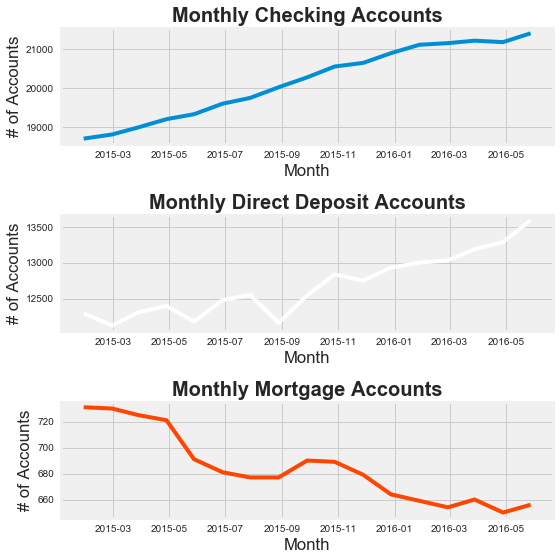

In [306]:
#Let us reproduce same steps as before with only the US data
segmData= data[data['segmento'] == '01 - TOP']
segmData= segmData.ix[:,24:]
segmData['date']= data['fecha_dato']

segMonthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    segMonthlyTotals = np.concatenate((segMonthlyTotals, segmData[segmData['date'] == months[i]].ix[:, segmData.columns != 'date'].sum().values.reshape((24,1))), axis=1)

#As before, we need to get rid of the first column since it was the initialization
#column that's just filled with zeros
segMonthlyTotals= segMonthlyTotals[:,1:]
segMonthlyTotalsTop= segMonthlyTotals

#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, segMonthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, segMonthlyTotals[23,:], color= 'white')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, segMonthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()

### 'Particular' Users

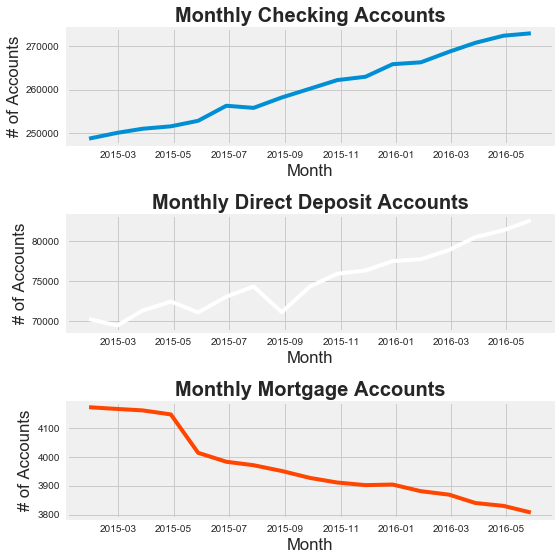

In [313]:
#Let us reproduce same steps as before with only the US data
segmData= data[data['segmento'] == '02 - PARTICULARES']
segmData= segmData.ix[:,24:]
segmData['date']= data['fecha_dato']

segMonthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    segMonthlyTotals = np.concatenate((segMonthlyTotals, segmData[segmData['date'] == months[i]].ix[:, segmData.columns != 'date'].sum().values.reshape((24,1))), axis=1)

#As before, we need to get rid of the first column since it was the initialization
#column that's just filled with zeros
segMonthlyTotals= segMonthlyTotals[:,1:]
segMonthlyTotalsPart= segMonthlyTotals

#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, segMonthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, segMonthlyTotals[23,:], color= 'white')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, segMonthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()

### 'University' Users

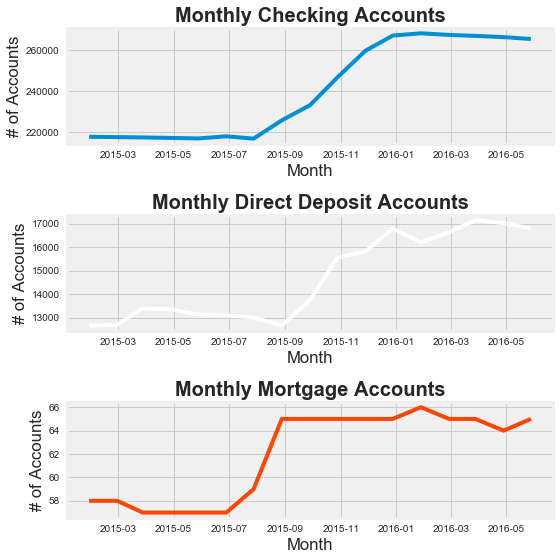

In [330]:
#Let us reproduce same steps as before with only the US data
segmData= data[data['segmento'] == '03 - UNIVERSITARIO']
segmData= segmData.ix[:,24:]
segmData['date']= data['fecha_dato']

segMonthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    segMonthlyTotals = np.concatenate((segMonthlyTotals, segmData[segmData['date'] == months[i]].ix[:, segmData.columns != 'date'].sum().values.reshape((24,1))), axis=1)

#As before, we need to get rid of the first column since it was the initialization
#column that's just filled with zeros
segMonthlyTotals= segMonthlyTotals[:,1:]
segMonthlyTotalsUni= segMonthlyTotals

#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, segMonthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, segMonthlyTotals[23,:], color= 'white')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, segMonthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()

### Non-Categorized Users

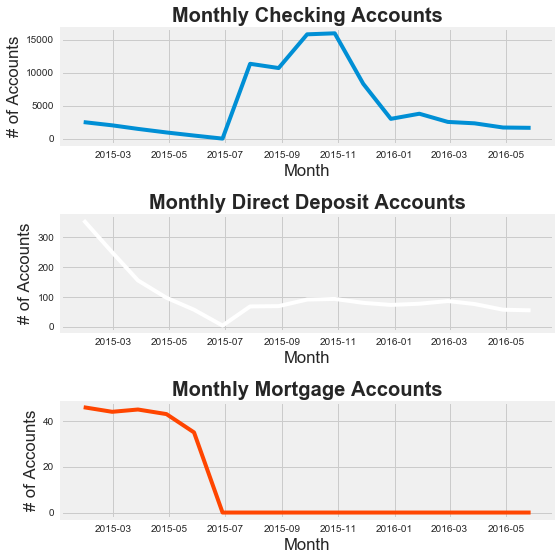

In [331]:
#Let us reproduce same steps as before with only the US data
segmData= data[data['segmento'].isnull()]
segmData= segmData.ix[:,24:]
segmData['date']= data['fecha_dato']

segMonthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    segMonthlyTotals = np.concatenate((segMonthlyTotals, segmData[segmData['date'] == months[i]].ix[:, segmData.columns != 'date'].sum().values.reshape((24,1))), axis=1)

#As before, we need to get rid of the first column since it was the initialization
#column that's just filled with zeros
segMonthlyTotals= segMonthlyTotals[:,1:]
segMonthlyTotalsNA= segMonthlyTotals

#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(8,8), facecolor= 'white')

plt.subplot(3,1,1)
plt.plot(months, segMonthlyTotals[2,:])
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Checking Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(months, segMonthlyTotals[23,:], color= 'white')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Direct Deposit Accounts', fontweight= 'bold')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(months, segMonthlyTotals[14,:], color= '#FF4500')
plt.xlabel('Month')
plt.ylabel('# of Accounts')
plt.title('Monthly Mortgage Accounts', fontweight= 'bold')
plt.tight_layout()

### Sum of 'University' and 'Particular' accounts

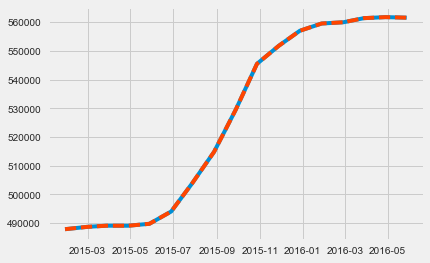

In [343]:
#Now let's plot the contributions of the two top 
#components (red) vs the total (blue)
plt.plot(months, monthlyTotals[2,:])
plt.plot(months, segMonthlyTotalsTop[2,:]+segMonthlyTotalsPart[2,:]+segMonthlyTotalsUni[2,:]+segMonthlyTotalsNA[2,:], color= '#FF4500', linestyle= 'dashed')

#plt.plot(months, segMonthlyTotalsTop[2,:])
#plt.plot(months, segMonthlyTotalsPart[2,:])
#plt.plot(months, segMonthlyTotalsUni[2,:])

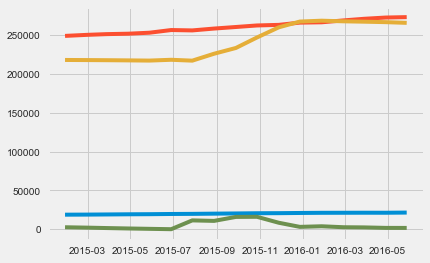

In [342]:
plt.plot(months, segMonthlyTotalsTop[2,:])
plt.plot(months, segMonthlyTotalsPart[2,:])
plt.plot(months, segMonthlyTotalsUni[2,:])
plt.plot(months, segMonthlyTotalsNA[2,:])


## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

In [321]:

(segMonthlyTotalsTop[2,:]+segMonthlyTotalsPart[2,:]+segMonthlyTotalsUni[2,:]).shape

(24, 17)